# Центральная предельная теорема своими руками

In [30]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

## Распределение и генерация выборки

Для исследования я выбрал экспоненциальное распределение.
Ниже приведена генерация выборки объема 1000, построение гистограммы и графика теоретической плотности вероятности. Вместо параметра normed был использован параметр density, т.к. моя версия python (3.7.3) считает его deprecated.

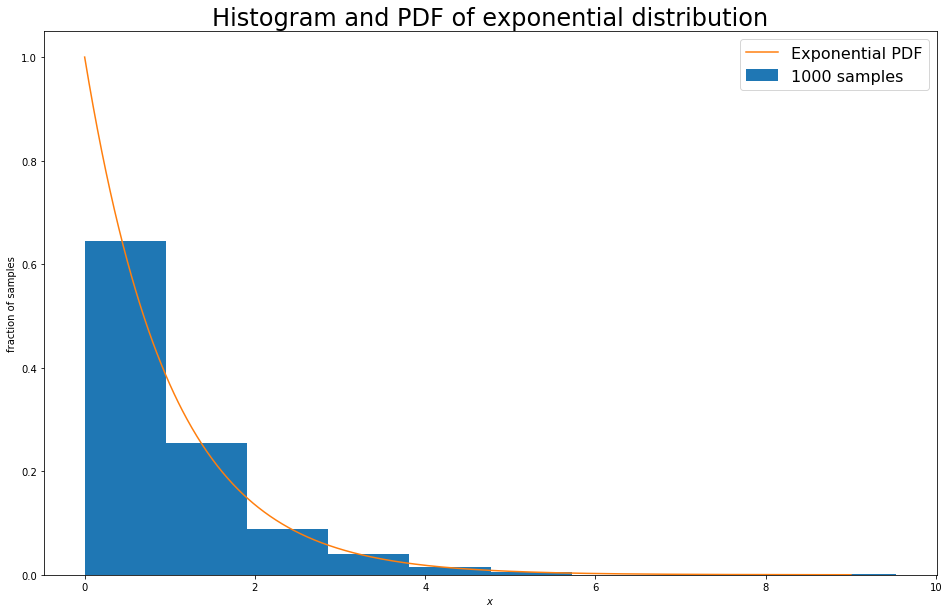

In [72]:
x = np.linspace(0, 9, 901)
sample = sts.expon.rvs(size=1000)

plt.figure(figsize=(16, 10))
plt.hist(sample, bins=10, label='1000 samples', density=True)
plt.plot(x, sts.expon.pdf(x), label='Exponential PDF')
plt.title('Histogram and PDF of exponential distribution', fontsize=24)
plt.xlabel('$x$')
plt.ylabel('fraction of samples')
plt.legend(loc='upper right', fontsize=16)
plt.show()

## Параметры генеральной совокупности

Генеральной совокупностью считаю выборку размера 1000, построенную в предыдущем пункте. Ниже приведены теоретические матожидание и дисперсия теоретического распределения.

In [88]:
mu = var = std = 1

## Распределения выборочных средних при разных объемах выборок

Построим распределение выборочных средних для разных значений n.

<Figure size 432x288 with 0 Axes>

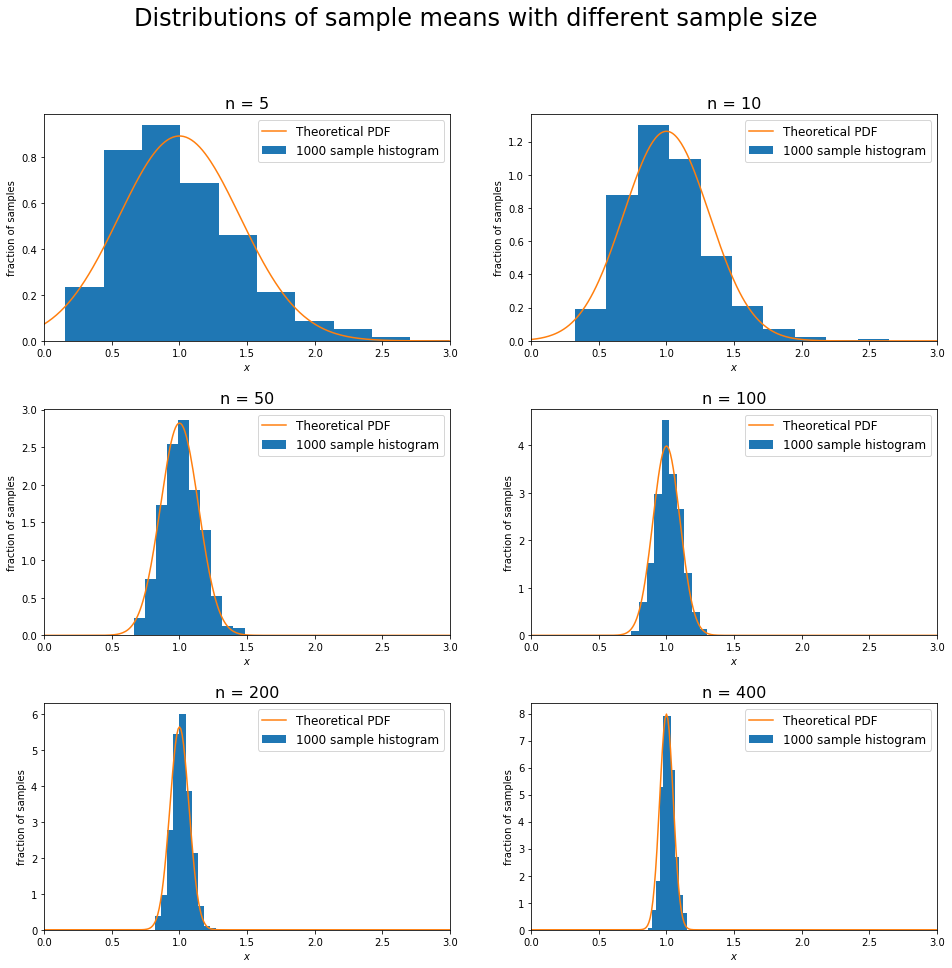

In [109]:
n_values = [5, 10, 50, 100, 200, 400]
plt.figure()
n_rows = (len(n_values) + 1) // 2
fig, ax = plt.subplots(n_rows, 2, figsize=(16, 5*n_rows))
fig.suptitle('Distributions of sample means with different sample size', fontsize=24)
fig.subplots_adjust(hspace=0.3)

for i, n in enumerate(n_values):
    subsamples = np.mean(np.random.choice(sample, (n, 1000)), axis=0)
    norm_dist = sts.norm(mu, np.sqrt(var/n)).pdf(x)
    bin_number = 10
    subtitle = 'n = {}'.format(n)
    ax.flat[i].hist(subsamples, bins=bin_number, label='1000 sample histogram', density=True)
    ax.flat[i].plot(x, norm_dist, label='Theoretical PDF')
    ax.flat[i].set_title(subtitle, fontsize=16)
    ax.flat[i].set(xlabel='$x$', ylabel='fraction of samples')
    ax.flat[i].legend(loc='upper right', fontsize=12)
    ax.flat[i].set_xlim([0, 3])
plt.show()


## Выводы

Из полученных графиков видно, что чем больше n, тем ближе распределение выборочных средних к нормальному с параметрами:
\begin{align}
\mu = 1 \\
\sigma = \frac{1}{\sqrt{n}}
\end{align}
Точность аппроксимации распределения выборочных средних растет с ростом n.